In [48]:
import pandas as pd

df_barueri = pd.read_csv('./donation_req/donation_requisition_barueri.csv')
df_jabaquara = pd.read_csv('./donation_req/donation_requisition_jabaquara.csv')
dps_barueri = pd.read_csv('./donation_req/studio_results_barueri.csv')
dps_jabaquara = pd.read_csv('./donation_req/studio_results_jabaquara.csv')

In [49]:
def convert_date_only(columns, df):
    for col in columns:
        df[col] = pd.to_datetime(df[col], errors='coerce').dt.date

In [50]:
# Creating columns to calculate time difference later
# And dropping unnecessary columns

# donation_requisition
df_barueri['created_at_req'] = pd.to_datetime(df_barueri['created_at'], format='mixed').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo') - pd.Timedelta(hours=3)
df_jabaquara['created_at_req'] = pd.to_datetime(df_jabaquara['created_at'], format='mixed').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo') - pd.Timedelta(hours=3)
df_barueri['updated_at_req'] = pd.to_datetime(df_barueri['updated_at'], format='mixed').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo') - pd.Timedelta(hours=3)
df_jabaquara['updated_at_req'] = pd.to_datetime(df_jabaquara['updated_at'], format='mixed').dt.tz_localize('UTC').dt.tz_convert('America/Sao_Paulo') - pd.Timedelta(hours=3)

df_barueri.drop(axis=0, columns=['note', 'start_time', 'end_time', 'updated_at'], inplace=True)
df_jabaquara.drop(axis=0, columns=['note', 'start_time', 'end_time', 'updated_at'], inplace=True)


# donation_packs
dps_barueri['collected_at_donation'] = pd.to_datetime(dps_barueri['collected_at'], format='mixed')
dps_barueri.rename(columns={
    'created_at': 'created_at_donation', 
    'updated_at': 'updated_at_donation'
    }, inplace=True)
dps_barueri['created_at_donation'] = pd.to_datetime(dps_barueri['created_at_donation'], format='mixed')
dps_barueri['updated_at_donation'] = pd.to_datetime(dps_barueri['updated_at_donation'], format='mixed')

dps_jabaquara['collected_at_donation'] = pd.to_datetime(dps_jabaquara['collected_at'], format='mixed')
dps_jabaquara.rename(columns={
    'created_at': 'created_at_donation', 
    'updated_at': 'updated_at_donation'
    }, inplace=True)
dps_jabaquara['created_at_donation'] = pd.to_datetime(dps_jabaquara['created_at_donation'], format='mixed')
dps_jabaquara['updated_at_donation'] = pd.to_datetime(dps_jabaquara['updated_at_donation'], format='mixed')

dps_barueri.drop(axis=0, columns=['donor_id'], inplace=True)
dps_jabaquara.drop(axis=0, columns=['donor_id'], inplace=True)

In [51]:
df_barueri.head()

,status_id,created_at,donor_id,created_at_req,updated_at_req
0,4,2025-07-17 17:15:10.753328,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-07-17 11:15:10.753328-03:00,2025-07-24 08:34:43.990296-03:00
1,4,2025-07-16 16:26:39.520198,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-07-16 10:26:39.520198-03:00,2025-07-24 08:34:43.990296-03:00
2,4,2025-05-19 00:00:00,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-18 18:00:00-03:00,2025-07-24 08:34:43.990296-03:00
3,4,2025-07-01 17:14:30.804874,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-07-01 11:14:30.804874-03:00,2025-07-24 08:34:43.990296-03:00
4,4,2025-07-02 18:34:45.661627,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-07-02 12:34:45.661627-03:00,2025-07-24 08:34:43.990296-03:00


In [52]:
df_jabaquara.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype                            
---  ------          --------------  -----                            
 0   status_id       127 non-null    int64                            
 1   created_at      127 non-null    object                           
 2   donor_id        127 non-null    object                           
 3   created_at_req  127 non-null    datetime64[ns, America/Sao_Paulo]
 4   updated_at_req  127 non-null    datetime64[ns, America/Sao_Paulo]
dtypes: datetime64[ns, America/Sao_Paulo](2), int64(1), object(2)
memory usage: 5.1+ KB


In [53]:
dps_barueri.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     179 non-null    object             
 1   status                 179 non-null    object             
 2   receiver_id            179 non-null    object             
 3   collected_at           179 non-null    object             
 4   created_at_donation    179 non-null    datetime64[ns, UTC]
 5   updated_at_donation    179 non-null    datetime64[ns, UTC]
 6   has_invoice_photo      179 non-null    bool               
 7   collected_at_donation  179 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](3), object(4)
memory usage: 10.1+ KB


In [54]:
dps_jabaquara.head()

,id,status,receiver_id,collected_at,created_at_donation,updated_at_donation,has_invoice_photo,collected_at_donation
0,f7b0e207-63b6-4306-8178-5263cac1ee78,open,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-07-10T19:00:00Z,2025-07-11 14:40:06.602403+00:00,2025-07-11 14:40:27.619350+00:00,False,2025-07-10 19:00:00+00:00
1,7d9b7a62-0caf-41f0-8bb7-2a6df21ca19c,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-05-13T19:30:00Z,2025-05-13 21:16:20.549205+00:00,2025-05-13 21:27:02.099082+00:00,True,2025-05-13 19:30:00+00:00
2,91464f22-42db-4d45-8533-2cb640b7f4c4,canceled,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-06-04T03:00:00Z,2025-06-05 20:52:27.540628+00:00,2025-06-05 20:52:55.458938+00:00,False,2025-06-04 03:00:00+00:00
3,a9bd191a-3131-4aca-87da-b80b1bc26c3c,canceled,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-05-14T03:00:00Z,2025-05-14 21:01:12.148568+00:00,2025-05-14 21:01:37.972680+00:00,False,2025-05-14 03:00:00+00:00
4,e1d934e9-ac0f-4748-8175-b7b9862b7d07,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-06-18T18:00:00Z,2025-06-18 19:32:56.808019+00:00,2025-06-18 20:39:28.139193+00:00,True,2025-06-18 18:00:00+00:00


Total de solicitações para barueri

In [55]:
df_barueri['donor_id'].count()

143

Total de solicitações para Jabaquara

In [56]:
df_jabaquara['donor_id'].count()

127

Total de coletas para barueri

In [57]:
dps_barueri['id'].count()

179

Total de coletas para jabaquara

In [58]:
dps_jabaquara['id'].count()

151

In [59]:
columns_drs = [ 'created_at']
columns_dps = ['collected_at']

In [60]:
convert_date_only(columns_drs, df_barueri)
convert_date_only(columns_drs, df_jabaquara)
convert_date_only(columns_dps, dps_barueri)
convert_date_only(columns_dps, dps_jabaquara)

In [61]:
df_jabaquara.head()

,status_id,created_at,donor_id,created_at_req,updated_at_req
0,4,2025-07-21,4df6b828-3159-4095-801f-67ab5f896fc3,2025-07-21 12:02:41.223581-03:00,2025-07-21 12:02:41.223581-03:00
1,4,2025-07-23,4df6b828-3159-4095-801f-67ab5f896fc3,2025-07-23 11:24:38.789601-03:00,2025-07-23 11:24:38.789601-03:00
2,4,2025-07-18,4df6b828-3159-4095-801f-67ab5f896fc3,2025-07-18 09:44:41.324639-03:00,2025-07-18 09:44:41.324639-03:00
3,4,2025-07-16,4df6b828-3159-4095-801f-67ab5f896fc3,2025-07-16 11:47:27.910869-03:00,2025-07-16 11:47:27.910869-03:00
4,4,2025-05-28,4df6b828-3159-4095-801f-67ab5f896fc3,2025-05-28 16:45:53.076181-03:00,2025-07-15 13:32:03.359119-03:00


In [62]:
df_jabaquara = df_jabaquara.sort_values('created_at')
dps_jabaquara = dps_jabaquara.sort_values('collected_at')

jab_merged_df = pd.merge(
    df_jabaquara,
    dps_jabaquara,
    left_on='created_at',
    right_on='collected_at',
    how='inner'  # or 'left' if you want all from df_jabaquara
)

# distinct_dates_df = jab_merged_df.drop_duplicates(subset=['created_at'])

In [63]:
df_barueri = df_barueri.sort_values('created_at')
dps_barueri = dps_barueri.sort_values('collected_at')

bar_merged_df = pd.merge(
    df_barueri,
    dps_barueri,
    left_on='created_at',
    right_on='collected_at',
    how='inner'  # or 'left' if you want all from df_jabaquara
)

In [64]:
jab_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype                            
---  ------                 --------------  -----                            
 0   status_id              122 non-null    int64                            
 1   created_at             122 non-null    object                           
 2   donor_id               122 non-null    object                           
 3   created_at_req         122 non-null    datetime64[ns, America/Sao_Paulo]
 4   updated_at_req         122 non-null    datetime64[ns, America/Sao_Paulo]
 5   id                     122 non-null    object                           
 6   status                 122 non-null    object                           
 7   receiver_id            122 non-null    object                           
 8   collected_at           122 non-null    object                           
 9   created_at_donation    122 non-n

In [65]:
bar_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype                            
---  ------                 --------------  -----                            
 0   status_id              149 non-null    int64                            
 1   created_at             149 non-null    object                           
 2   donor_id               149 non-null    object                           
 3   created_at_req         149 non-null    datetime64[ns, America/Sao_Paulo]
 4   updated_at_req         149 non-null    datetime64[ns, America/Sao_Paulo]
 5   id                     149 non-null    object                           
 6   status                 149 non-null    object                           
 7   receiver_id            149 non-null    object                           
 8   collected_at           149 non-null    object                           
 9   created_at_donation    149 non-n

In [66]:
bar_merged_df.sort_values('created_at').head(10)

,status_id,created_at,donor_id,created_at_req,updated_at_req,id,status,receiver_id,collected_at,created_at_donation,updated_at_donation,has_invoice_photo,collected_at_donation
0,4,2025-05-20,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-20 16:26:36.217308-03:00,2025-07-24 08:34:43.990296-03:00,527ad765-42c6-41fc-8561-60b6caf03ee1,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-20,2025-05-20 19:28:51.650048+00:00,2025-05-20 19:57:53.102972+00:00,True,2025-05-20 18:30:00+00:00
1,4,2025-05-21,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-21 16:26:36.217308-03:00,2025-07-24 08:34:43.990296-03:00,98b78f4b-7670-4e96-919e-12bf34d653e9,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-21,2025-05-19 16:22:59.537396+00:00,2025-05-21 21:28:00.758792+00:00,False,2025-05-21 18:45:00+00:00
2,4,2025-05-21,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-21 16:26:36.217308-03:00,2025-07-24 08:34:43.990296-03:00,54d57a80-dd26-46f9-b4f4-69c9c00ce142,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-21,2025-05-21 21:36:02.441260+00:00,2025-05-21 21:48:43.591383+00:00,True,2025-05-21 18:45:00+00:00
3,4,2025-05-22,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-22 16:32:42.493695-03:00,2025-07-24 08:34:43.990296-03:00,fe86c162-f181-493b-ab47-87e9a9a0cb33,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-22,2025-05-22 21:07:24.334989+00:00,2025-05-22 21:19:28.243795+00:00,True,2025-05-22 18:45:00+00:00
4,4,2025-05-23,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-23 16:32:42.493695-03:00,2025-07-24 08:34:43.990296-03:00,256882dd-79ca-4894-97b6-c2abf0736b70,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-23,2025-05-23 21:30:01.966839+00:00,2025-05-23 21:42:37.759166+00:00,True,2025-05-23 18:30:00+00:00
5,4,2025-05-24,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-24 16:33:22.832851-03:00,2025-07-24 08:34:43.990296-03:00,0e821ed1-329b-4a07-8daf-bc4fb911e121,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-24,2025-05-24 22:21:29.769062+00:00,2025-05-24 22:34:43.433812+00:00,True,2025-05-24 18:30:00+00:00
6,4,2025-05-26,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-26 16:33:22.832851-03:00,2025-07-24 08:34:43.990296-03:00,60d4f2ef-6e99-4595-8f16-7fc844f5c96e,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-26,2025-05-26 22:09:00.806415+00:00,2025-05-26 22:20:47.189619+00:00,True,2025-05-26 20:00:00+00:00
7,4,2025-05-27,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-27 16:33:22.832851-03:00,2025-07-24 08:34:43.990296-03:00,a9e4755e-3049-4ae6-b9c9-94f872d527da,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-27,2025-05-27 21:12:42.708621+00:00,2025-05-27 21:20:19.515354+00:00,True,2025-05-27 18:30:00+00:00
8,4,2025-05-28,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-28 16:33:22.832851-03:00,2025-07-24 08:34:43.990296-03:00,b94ec054-d133-4381-9148-4adb4fa929c4,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-28,2025-05-28 22:12:26.375940+00:00,2025-05-28 22:32:27.895357+00:00,True,2025-05-28 18:40:00+00:00
9,4,2025-05-29,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-29 16:33:22.832851-03:00,2025-07-24 08:34:43.990296-03:00,a466cfb3-985c-4816-80d8-bb76970ddda8,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-29,2025-05-29 20:42:13.182050+00:00,2025-05-29 21:01:31.259986+00:00,True,2025-05-29 18:00:00+00:00


In [67]:
jab_merged_df.sort_values('created_at').tail(10)

,status_id,created_at,donor_id,created_at_req,updated_at_req,id,status,receiver_id,collected_at,created_at_donation,updated_at_donation,has_invoice_photo,collected_at_donation
112,4,2025-11-04,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-04 06:49:33.690061-03:00,2025-11-04 06:49:33.690061-03:00,e9ee91bd-5f33-41a1-aba7-9558ad8f6af1,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-04,2025-11-06 22:01:02.786924+00:00,2025-11-07 02:24:47.385699+00:00,False,2025-11-04 18:12:00+00:00
113,1,2025-11-07,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-07 11:50:48.267608-03:00,2025-11-07 11:50:48.267608-03:00,82ddd7f9-a02f-4e96-91f8-8e3d8afa40d2,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-07,2025-11-12 01:34:12.371240+00:00,2025-11-12 01:41:22.827432+00:00,True,2025-11-07 21:00:00+00:00
114,4,2025-11-08,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-08 06:36:54.242974-03:00,2025-11-08 06:36:54.242974-03:00,5042757a-b496-46bd-912f-4a868d7d4099,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-08,2025-11-09 23:59:10.078794+00:00,2025-11-10 00:45:03.333553+00:00,False,2025-11-08 16:30:00+00:00
115,4,2025-11-11,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-11 09:29:17.404186-03:00,2025-11-11 09:29:17.404186-03:00,72b8aee2-770b-439c-99e3-e80338fa9b70,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-11,2025-11-12 01:31:53.691972+00:00,2025-11-12 01:50:53.987303+00:00,False,2025-11-11 19:08:00+00:00
116,2,2025-11-13,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-13 11:19:41.623549-03:00,2025-11-13 11:19:41.623549-03:00,28205672-0132-4f2e-9035-468b94830c4a,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-13,2025-11-17 01:01:52.853886+00:00,2025-11-17 01:23:27.987416+00:00,True,2025-11-13 18:30:00+00:00
117,4,2025-11-21,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-21 11:24:46.841885-03:00,2025-11-21 11:24:46.841885-03:00,879d8b00-a87b-458c-9269-a082c986a2f2,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-21,2025-11-24 00:12:00.755205+00:00,2025-11-24 00:59:01.390552+00:00,False,2025-11-21 19:11:00+00:00
118,4,2025-11-25,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-25 09:08:45.148262-03:00,2025-11-25 09:08:45.148262-03:00,f26fa438-f9c5-4d44-9e08-ace362f8aa91,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-25,2025-11-26 01:43:36.579708+00:00,2025-11-26 02:11:45.792019+00:00,False,2025-11-25 18:43:00+00:00
119,4,2025-11-27,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-27 12:19:23.105659-03:00,2025-11-27 12:19:23.105659-03:00,861b3a53-dc4f-44da-b802-464b2cabd54f,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-27,2025-11-29 01:13:40.654109+00:00,2025-11-29 01:38:00.042928+00:00,False,2025-11-27 19:13:00+00:00
120,4,2025-11-28,4df6b828-3159-4095-801f-67ab5f896fc3,2025-11-28 09:09:52.488350-03:00,2025-11-28 09:09:52.488350-03:00,10eaa1c6-3328-4d77-8664-997139db1104,closed,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-11-28,2025-11-29 00:53:01.959963+00:00,2025-11-29 01:07:53.867656+00:00,False,2025-11-28 18:52:00+00:00
121,1,2025-12-01,4df6b828-3159-4095-801f-67ab5f896fc3,2025-12-01 11:44:45.400390-03:00,2025-12-01 11:44:45.400390-03:00,1a79ef64-91b9-4b6d-b162-16f66367cb83,canceled,b3d05649-9d1f-4d9c-a652-a4b335fd053a,2025-12-01,2025-12-02 15:41:08.693226+00:00,2025-12-02 15:41:26.473647+00:00,False,2025-12-01 03:00:00+00:00


In [68]:
bar_merged_df[bar_merged_df['has_invoice_photo'] == False]

,status_id,created_at,donor_id,created_at_req,updated_at_req,id,status,receiver_id,collected_at,created_at_donation,updated_at_donation,has_invoice_photo,collected_at_donation
1,4,2025-05-21,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-05-21 16:26:36.217308-03:00,2025-07-24 08:34:43.990296-03:00,98b78f4b-7670-4e96-919e-12bf34d653e9,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-05-21,2025-05-19 16:22:59.537396+00:00,2025-05-21 21:28:00.758792+00:00,False,2025-05-21 18:45:00+00:00
60,4,2025-07-31,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-07-31 10:12:37.464623-03:00,2025-07-31 10:12:37.464623-03:00,788c4fbd-b980-4382-a456-af821cb5f2a5,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-07-31,2025-07-31 21:24:06.623542+00:00,2025-07-31 21:24:41.787439+00:00,False,2025-07-31 18:30:00+00:00
82,4,2025-09-01,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-09-01 12:05:49.397876-03:00,2025-09-01 12:05:49.397876-03:00,e3c1a5ff-62c3-46bc-ad95-c968a1e4d30b,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-09-01,2025-09-01 20:23:01.100742+00:00,2025-09-01 20:23:55.716913+00:00,False,2025-09-01 18:30:00+00:00
92,4,2025-09-16,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-09-16 12:24:16.088388-03:00,2025-09-16 12:24:16.088388-03:00,a498e725-ce02-40f3-b0e7-951f62a20557,closed,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-09-16,2025-09-16 20:47:43.590504+00:00,2025-09-16 21:08:48.611116+00:00,False,2025-09-16 20:56:00+00:00
129,1,2025-11-03,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-11-03 08:47:23.596495-03:00,2025-11-03 08:47:23.596495-03:00,473cd64f-25c7-47c0-8c1d-453200d9194e,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-11-03,2025-11-03 18:25:33.036714+00:00,2025-11-03 18:26:05.233743+00:00,False,2025-11-03 14:30:00+00:00
132,1,2025-11-03,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-11-03 05:41:31.046612-03:00,2025-11-03 05:41:31.046612-03:00,473cd64f-25c7-47c0-8c1d-453200d9194e,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-11-03,2025-11-03 18:25:33.036714+00:00,2025-11-03 18:26:05.233743+00:00,False,2025-11-03 14:30:00+00:00
141,3,2025-11-17,7c2166f9-688b-40c6-8f2f-55113a223be4,2025-11-17 12:01:28.280766-03:00,2025-11-17 12:01:28.280766-03:00,e8029b60-60b8-4ee8-a25e-0171a8bef0ae,open,ec05bd3e-cff1-4df6-81e1-b2eb0d5b4f1f,2025-11-17,2025-11-17 20:59:48.160495+00:00,2025-11-17 21:32:50.252232+00:00,False,2025-11-17 21:32:00+00:00


In [69]:
def monthly_donations_per_month(df, id, column):
    dict_month = {}
    months = [ 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro' ]
    for i, month in enumerate(months, start=5):
        start_date = pd.Timestamp(year=2025, month=i, day=1)

        if i < 12:
            end_date = pd.Timestamp(year=2025, month=i + 1, day=1)
        else:
            end_date = pd.Timestamp(year=2026, month=1, day=1)

        month_df = df[(df[column] >= start_date.date()) & (df[column] < end_date.date()) & (df['status'] == 'closed')].sort_values(by=column, ascending=True)
        dict_month[month] = month_df[id].count()

        print(month, dict_month[month])
        print()

    total = 0

    for month in  dict_month:
        total += dict_month[month]

    dict_month['Total'] = total
    print('Total:', total)

    return dict_month


In [70]:
def monthly_donations_per_month_mvp_registered(df, id, column):
    dict_month = {}
    months = [ 'Maio', 'Junho', 'Julho', 'Agosto', 'Setembro', 'Outubro', 'Novembro', 'Dezembro' ]
    for i, month in enumerate(months, start=5):
        start_date = pd.Timestamp(year=2025, month=i, day=1)

        if i < 12:
            end_date = pd.Timestamp(year=2025, month=i + 1, day=1)
        else:
            end_date = pd.Timestamp(year=2026, month=1, day=1)

        month_df = df[(df[column] >= start_date.date()) & (df[column] < end_date.date()) & (df['has_invoice_photo'] == False) & (df['status'] == 'closed')].sort_values(by=column, ascending=True)
        dict_month[month] = month_df[id].count()

        print(month, dict_month[month])
        print()

    total = 0

    for month in  dict_month:
        total += dict_month[month]

    dict_month['Total'] = total
    print('Total:', total)

    return dict_month

In [71]:
dps_jabaquara.info()

<class 'pandas.core.frame.DataFrame'>
Index: 151 entries, 1 to 150
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   id                     151 non-null    object             
 1   status                 151 non-null    object             
 2   receiver_id            151 non-null    object             
 3   collected_at           151 non-null    object             
 4   created_at_donation    151 non-null    datetime64[ns, UTC]
 5   updated_at_donation    151 non-null    datetime64[ns, UTC]
 6   has_invoice_photo      151 non-null    bool               
 7   collected_at_donation  151 non-null    datetime64[ns, UTC]
dtypes: bool(1), datetime64[ns, UTC](3), object(4)
memory usage: 9.6+ KB


In [72]:
barueri_donations_per_month = monthly_donations_per_month(dps_barueri, 'id', 'collected_at')

Maio 16

Junho 20

Julho 28

Agosto 27

Setembro 25

Outubro 26

Novembro 21

Dezembro 2

Total: 165


In [73]:
jabaquara_donations_per_month = monthly_donations_per_month(dps_jabaquara, 'id', 'collected_at')

Maio 13

Junho 18

Julho 22

Agosto 19

Setembro 18

Outubro 15

Novembro 11

Dezembro 0

Total: 116


In [74]:
barueri_requisitions_per_month_per_mvp = monthly_donations_per_month(bar_merged_df, 'id', 'created_at')

Maio 10

Junho 22

Julho 28

Agosto 19

Setembro 19

Outubro 22

Novembro 18

Dezembro 1

Total: 139


In [ ]:
jabaquara_requisitions_per_month_mvp = monthly_donations_per_month(jab_merged_df, 'id', 'created_at')

onginfineat!

Maio 11

Junho 18

Julho 22

Agosto 15

Setembro 14

Outubro 15

Novembro 9

Dezembro 0

Total: 104


In [76]:
barueri_donations_per_month_per_mvp_registered = monthly_donations_per_month_mvp_registered(bar_merged_df, 'id', 'created_at')

Maio 0

Junho 0

Julho 0

Agosto 0

Setembro 1

Outubro 0

Novembro 0

Dezembro 0

Total: 1


In [77]:
jabaquara_donations_per_month_mvp_registered = monthly_donations_per_month_mvp_registered(jab_merged_df, 'id', 'created_at')

Maio 0

Junho 0

Julho 9

Agosto 13

Setembro 6

Outubro 5

Novembro 7

Dezembro 0

Total: 40


In [78]:
import matplotlib.pyplot as plt

# Suppose your dictionary is like this:
# my_dict = {'Maio': 10, 'Junho': 15, 'Julho': 7, ...}

# Remove 'Total' if present
def plot_donations_per_month(donations_dict, color, label=None):
    data = {k: v for k, v in donations_dict.items() if k != 'Total'}

    plt.figure(figsize=(10, 6))
    plt.bar(data.keys(), data.values(), color=color)
    plt.xlabel('Mês')
    plt.ylabel('Quantidade')
    plt.title(label if label else 'Doações por mês')
    plt.xticks(rotation=45)
    for y in plt.gca().get_yticks():
        plt.axhline(y, color='black', linestyle='--', linewidth=0.5, alpha=0.8)
    plt.show()

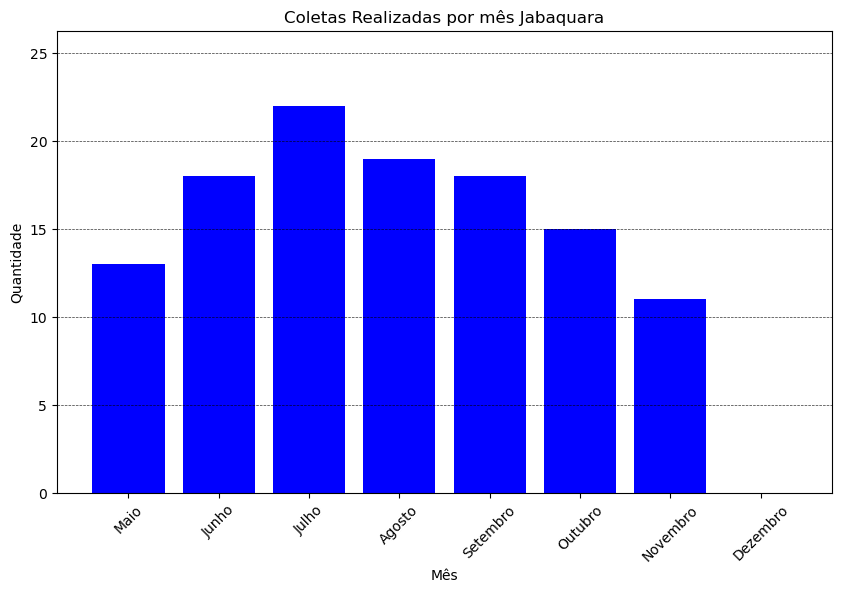

In [79]:
plot_donations_per_month(jabaquara_donations_per_month, 'blue', 'Coletas Realizadas por mês Jabaquara')

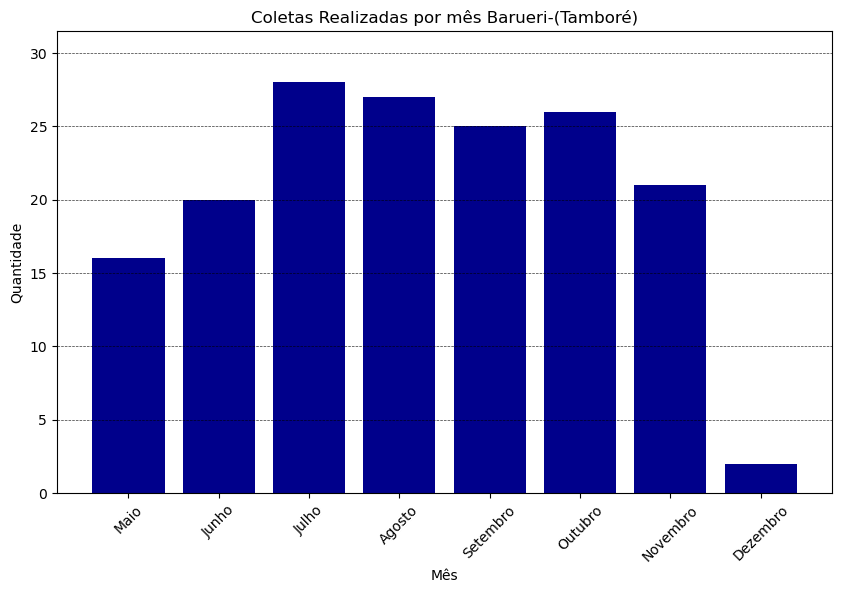

In [80]:
plot_donations_per_month(barueri_donations_per_month, 'darkblue', 'Coletas Realizadas por mês Barueri-(Tamboré)')

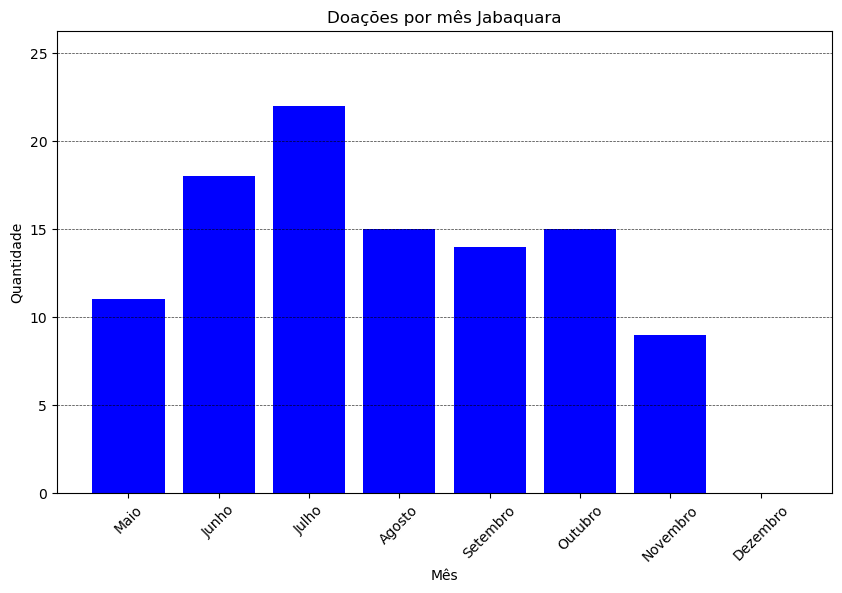

In [81]:
plot_donations_per_month(jabaquara_requisitions_per_month_mvp, 'blue', 'Doações por mês Jabaquara')

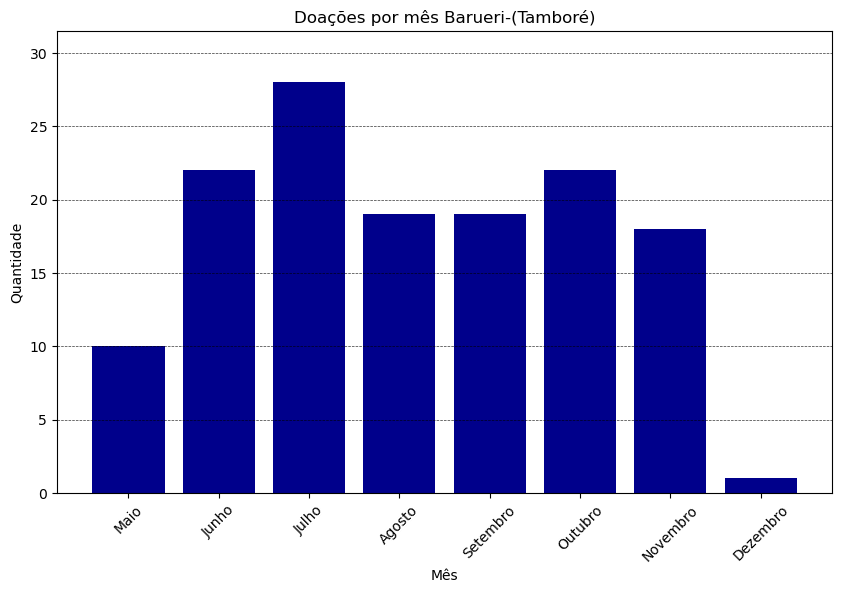

In [99]:
plot_donations_per_month(barueri_requisitions_per_month_per_mvp, 'darkblue', 'Doações por mês Barueri-(Tamboré)')

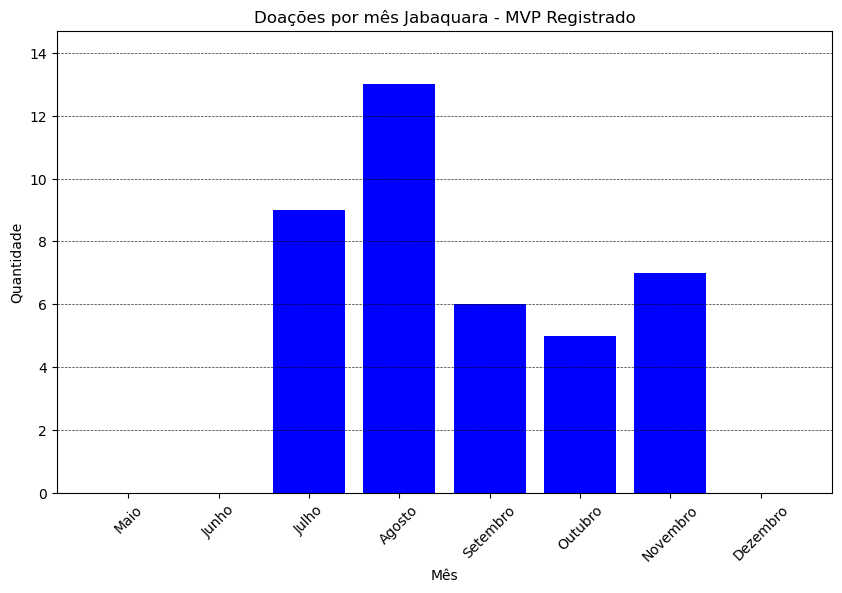

In [83]:
plot_donations_per_month(jabaquara_donations_per_month_mvp_registered, 'blue', 'Doações por mês Jabaquara - MVP Registrado')

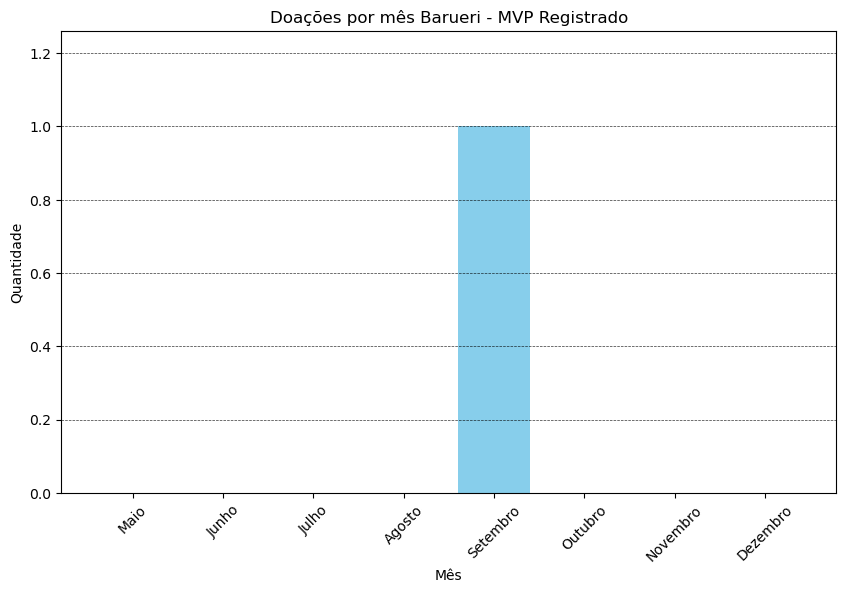

In [84]:
plot_donations_per_month(barueri_donations_per_month_per_mvp_registered, 'skyblue', 'Doações por mês Barueri - MVP Registrado')


In [85]:
# df_jabaquara_raw = pd.read_csv('./donation_req/studio_results_jabaquara.csv')
# df_barueri_raw = pd.read_csv('./donation_req/studio_results_barueri.csv')

# df_jabaquara_raw = df_jabaquara_raw.drop(axis=0, columns=['status', 'receiver_id', 'donor_id', 'has_invoice_photo'])
# df_barueri_raw = df_barueri_raw.drop(axis=0, columns=['status', 'receiver_id', 'donor_id', 'has_invoice_photo'])

In [86]:
# jab_merged_df = jab_merged_df.merge(df_jabaquara_raw, on='id', how='inner',  suffixes=('', '_full'))
# bar_merged_df = bar_merged_df.merge(df_barueri_raw, on='id', how='inner',  suffixes=('', '_full'))

In [87]:
jab_merged_df['id'].count()

122

In [88]:
# Remove rows where collection time is before request time
jab_merged_df['avg_time_request_to_collect'] =  jab_merged_df['collected_at_donation'] - jab_merged_df['created_at_req']
jab_merged_df['avg_time_collect_to_close'] =  jab_merged_df['created_at_donation'] - jab_merged_df['collected_at_donation']
jab_merged_df['avg_time_full_donation'] =  jab_merged_df['created_at_donation'] - jab_merged_df['created_at_req']

jab_merged_df_valid = jab_merged_df[jab_merged_df['avg_time_collect_to_close'] >= pd.Timedelta(0)]
jab_merged_df_valid = jab_merged_df[jab_merged_df['avg_time_request_to_collect'] >= pd.Timedelta(0)]
jab_merged_df_valid = jab_merged_df[jab_merged_df['avg_time_full_donation'] >= pd.Timedelta(0)]

jab_merged_df_valid['id'].count()

118

In [89]:
# Check a few rows to see the actual timestamps
print("Sample timestamps:")
print(jab_merged_df[['created_at_donation', 'collected_at_donation', 'avg_time_collect_to_close', 'avg_time_full_donation']].sample(5))

Sample timestamps:
                 created_at_donation     collected_at_donation  \
115 2025-11-12 01:31:53.691972+00:00 2025-11-11 19:08:00+00:00   
106 2025-10-27 01:52:19.069737+00:00 2025-10-22 18:52:00+00:00   
6   2025-05-27 21:59:08.512403+00:00 2025-05-27 18:00:00+00:00   
5   2025-05-27 21:11:42.545211+00:00 2025-05-26 20:30:00+00:00   
96  2025-10-07 01:19:24.993345+00:00 2025-10-06 18:45:00+00:00   

    avg_time_collect_to_close avg_time_full_donation  
115    0 days 06:23:53.691972 0 days 13:02:36.287786  
106    4 days 07:00:19.069737 4 days 11:26:24.674399  
6      0 days 03:59:08.512403 0 days 02:13:15.436222  
5      1 days 00:41:42.545211 1 days 01:25:49.469030  
96     0 days 06:34:24.993345 0 days 11:02:50.505742  


Média de preenchimentos

- da solicitação a coleta
- da coleta até o final do preenchimento

In [90]:
jab_merged_df_valid['avg_time_request_to_collect'].mean()

Timedelta('0 days 04:15:58.278429305')

In [91]:
jab_merged_df_valid['avg_time_collect_to_close'].mean()

Timedelta('1 days 14:25:09.737416059')

In [92]:
jab_merged_df_valid['avg_time_full_donation'].mean()

Timedelta('1 days 18:41:08.015845364')

In [93]:
bar_merged_df['id'].count()

149

Média de preenchimentos

- da solicitação a coleta
- da coleta até o final do preenchimento

In [94]:
bar_merged_df['avg_time_collect_to_close'] =  bar_merged_df['created_at_donation'] - bar_merged_df['collected_at_donation']
bar_merged_df['avg_time_request_to_collect'] =  bar_merged_df['collected_at_donation'] - bar_merged_df['created_at_req']
bar_merged_df['avg_time_full_donation'] =  bar_merged_df['created_at_donation'] - bar_merged_df['created_at_req']

bar_merged_df_valid = bar_merged_df[bar_merged_df['avg_time_request_to_collect'] >= pd.Timedelta(0)]
bar_merged_df_valid = bar_merged_df[bar_merged_df['avg_time_collect_to_close'] >= pd.Timedelta(0)]
bar_merged_df_valid = bar_merged_df[bar_merged_df['avg_time_full_donation'] >= pd.Timedelta(0)]


bar_merged_df_valid['id'].count()

148

In [95]:
bar_merged_df_valid['avg_time_request_to_collect'].mean()

Timedelta('0 days 04:19:44.864617135')

In [96]:
bar_merged_df_valid['avg_time_collect_to_close'].mean()

Timedelta('0 days 03:08:23.773415087')

In [97]:
bar_merged_df_valid['avg_time_full_donation'].mean()

Timedelta('0 days 07:28:08.638032222')

In [98]:
# Check a few rows to see the actual timestamps
print("Sample timestamps:")
print(bar_merged_df[['created_at_donation', 'collected_at_donation', 'avg_time_collect_to_close']].sample(5))

Sample timestamps:
                 created_at_donation     collected_at_donation  \
142 2025-11-19 21:21:50.700482+00:00 2025-11-19 16:42:00+00:00   
46  2025-07-16 23:10:40.717012+00:00 2025-07-16 19:30:00+00:00   
64  2025-08-02 20:47:09.172700+00:00 2025-08-02 17:00:00+00:00   
96  2025-09-22 20:59:16.273624+00:00 2025-09-22 19:40:00+00:00   
93  2025-09-17 23:17:32.605062+00:00 2025-09-17 19:30:00+00:00   

    avg_time_collect_to_close  
142    0 days 04:39:50.700482  
46     0 days 03:40:40.717012  
64     0 days 03:47:09.172700  
96     0 days 01:19:16.273624  
93     0 days 03:47:32.605062  
